In [5]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [6]:
# Step 1: Define the production dataset generator
from sklearn.datasets import make_moons, make_circles

def generate_dataset_prod(sample=300, random_state=60):   
    X, y = make_circles(n_samples=sample, noise=0.1, random_state=random_state)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=sample, noise=0.1, random_state=random_state)
    df2 = pd.DataFrame(X1)
    df2['y'] = y  

    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [7]:
# Step 2: Load the saved model
import joblib
model = joblib.load("best_model.pkl")

In [8]:
# Step 3: Generate production dataset
X_prod, y_prod = generate_dataset_prod()

# Step 4: Make predictions and evaluate
y_pred = model.predict(X_prod)

# Print basic evaluation
print("Accuracy on production data:", accuracy_score(y_prod, y_pred))
print("\nClassification Report:\n", classification_report(y_prod, y_pred))


Accuracy on production data: 0.8483333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       300
           1       0.85      0.84      0.85       300

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



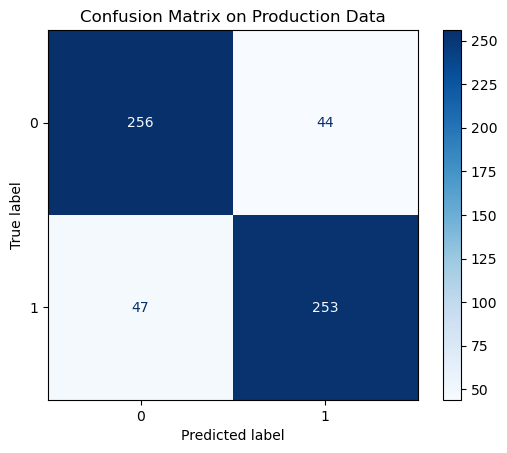

In [9]:
# confusion matrix plot
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_prod, y_pred, cmap="Blues")
plt.title("Confusion Matrix on Production Data")
plt.show()